In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Activity 5b: Homogeneous Linear Systems with Complex Eigenvalues

Let's recap what we learned last time!

1. You can find the solutions to a homogeneous linear system of differential equations by investigating the eigenvalues ($\lambda_i$) and eigenvectors ($\vec{v}_i$) of the system.
2. If the eigenvalues are distinct and *real* the solution is a superposition of each eigenvector muptiplied by $e^{\lambda_i t}$.
3. You can solve for the coefficients of the superposition by imposing initial conditions on the problem.

In this activity we're only going to generalize a *little* bit. We'll allow for *complex* eigenvalues and eigenvectors.

How does this change the answer? My goal is to convince you that it actually changes nothing. The same exact solutions _still_ _work_.

The problem is that it's a bit harder to work with complex solutions manually (pencil and paper) so math teachers have cooked up a lot of instruction about how to write things in terms of real trigonometric functions. However the symbolic algebra packages (e.g., sympy) don't have any problem with complex numbers! Let's see how this works and how we can still use sympy to get solutions that even a math instructor would accept!

Here's an example problem.

suppose we have two populations of ill fated bacteria, $y_1$ and $y_2$. They have the following coupling equations:

\begin{align}
dy_1/dt & = y_1 - 2 y_2 \\
dy_2/dt & = 6 y_1 - 6 y_2
\end{align}

In [2]:
t = sp.symbols("t", real=True)
A = sp.Matrix([[1,-2],[6,-6]])
P,D = A.diagonalize()
P,D

(Matrix([
 [1, 2],
 [2, 3]]),
 Matrix([
 [-3,  0],
 [ 0, -2]]))

So you can see we've got two distinct real eigenvalues. Suppose at $t=0$ we have $y_1=20$ and $y_2=10$. What are the solutions? Well from activity 5a it's easy:

$$ \vec{y}(t) = P e^{Dt} P^{-1} \vec{y}(0) $$

In [3]:
y_soln = P*sp.exp(D*t)*P.inv()*sp.Matrix([20,10])
y_soln

Matrix([
[60*exp(-2*t) - 40*exp(-3*t)],
[90*exp(-2*t) - 80*exp(-3*t)]])

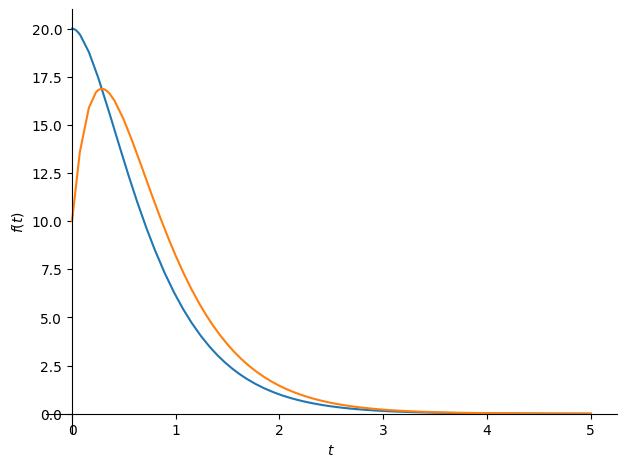

In [4]:
sp.plot(y_soln[0],y_soln[1],(t,0,5))

Bingo! That was easy! You see what I mean by "ill fated"?

Now suppose we had some other bacterial that had the same basic relationship, but *different* coefficients? Also, let's assume that $y_1$ and $y_2$ here measure not the absolute population, but rather the deviation of the population from a fixed point. This way positive and negative numbers are OK. Note this is commonly done when dealing with non-linear problems, which we'll encounter later in the course.

\begin{align}
dy_1/dt & = -3 y_1 + 1 y_2 \\
dy_2/dt & = -2 y_1 - 1 y_2
\end{align}

How would this population behave differently?

In [5]:
t = sp.symbols("t", real=True)
A = sp.Matrix([[-3,1],[-2,-1]])
P,D = A.diagonalize()
P,D

(Matrix([
 [1 + I, 1 - I],
 [    2,     2]]),
 Matrix([
 [-2 - I,      0],
 [     0, -2 + I]]))

What? Note that both the eigenvalues, *and* the eigenvectors are *complex*. Also, note that they are also complex conjugates of one another.

How can we solve this system? What if we just did the same thing and ignored the fact that the eigenvalues and eigenvectors are complex?

In [6]:
y_soln = P*sp.exp(D*t)*P.inv()*sp.Matrix([20,10])
y_soln

Matrix([
[-10*I*(1 + I)*exp(t*(-2 - I)) + 10*(1/4 + I/4)*(1 + I)*exp(t*(-2 - I)) + 10*(1/4 - I/4)*(1 - I)*exp(t*(-2 + I)) + 10*I*(1 - I)*exp(t*(-2 + I))],
[                                -20*I*exp(t*(-2 - I)) + 20*(1/4 + I/4)*exp(t*(-2 - I)) + 20*(1/4 - I/4)*exp(t*(-2 + I)) + 20*I*exp(t*(-2 + I))]])

Yikes! That looks complicated! But wait. Look carefully at the solutions. Each term is added to another term that is its exact complex conjugate. What does this mean? It means that the *sum* is automatically *real*. We cannot help but to get a real solution. The eigenvalues and eigen vectors always come in conjugate pairs. The initial conditions are always real, so when you solve you get superposition coefficients that are *also* conjugate pairs, this means the solution will always be *real* without fail.

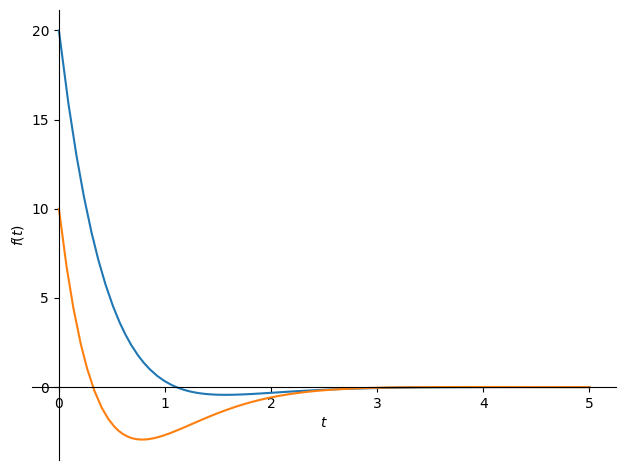

In [7]:
sp.plot(y_soln[0],y_soln[1],(t,0,5))

Perfect! But how can we get a real solution that's easier to understand that all those complex exponentials? We can use the `as_real_imag()` function to do that:

In [8]:
re_part, im_part = y_soln.as_real_imag()
re_part

Matrix([
[-10*exp(-2*t)*sin(t) + 20*exp(-2*t)*cos(t)],
[-30*exp(-2*t)*sin(t) + 10*exp(-2*t)*cos(t)]])

In [9]:
im_part

Matrix([
[0],
[0]])

As you can see, the imaginary part of the final solution was in fact, zero.

You can also see that the `as_real_imag()` function is the key to getting answers for homework. Suppose the homework wanted you to write the general solution in terms of real functions an unknown coefficients? We could invent unknown coefficients $c_1$ and $c_2$ and solve for those:

In [10]:
c1,c2=sp.symbols("c1 c2",real=True)

If we look at one of the eigenvectors multiplied by the corresponding exponential and break it into real and imaginary parts, those parts will end up being independent. We could create a real general solution by superposing those parts:

In [11]:
one_evec_soln = P.col(0)*sp.exp(D[0]*t)
one_evec_soln

Matrix([
[(1 + I)*exp(t*(-2 - I))],
[      2*exp(t*(-2 - I))]])

What do we get if we break this into real and imaginary parts?

In [12]:
re_part, im_part = one_evec_soln.as_real_imag()
re_part, im_part

(Matrix([
 [exp(-2*t)*sin(t) + exp(-2*t)*cos(t)],
 [                 2*exp(-2*t)*cos(t)]]),
 Matrix([
 [-exp(-2*t)*sin(t) + exp(-2*t)*cos(t)],
 [                 -2*exp(-2*t)*sin(t)]]))

Note these real and imaginary parts are exactly the same as Charnley's independent solutions from section 4.5 of the text. You'll need to use these with WebWork to get the "right" answer for those homework problems. Happily, sympy makes it pretty easy!

In [13]:
gen_soln = c1*re_part+c2*im_part
gen_soln

Matrix([
[c1*(exp(-2*t)*sin(t) + exp(-2*t)*cos(t)) + c2*(-exp(-2*t)*sin(t) + exp(-2*t)*cos(t))],
[                                       2*c1*exp(-2*t)*cos(t) - 2*c2*exp(-2*t)*sin(t)]])

We could even solve this version for c1, and c2

In [14]:
coeffs = sp.solve(gen_soln.subs(t,0)-sp.Matrix([20,10]),(c1,c2))
coeffs


{c1: 5, c2: 15}

In [15]:
gen_soln.subs(coeffs)

Matrix([
[-10*exp(-2*t)*sin(t) + 20*exp(-2*t)*cos(t)],
[-30*exp(-2*t)*sin(t) + 10*exp(-2*t)*cos(t)]])

# Now it's your turn!

You encounter a couple of symbiotic organisms. After much study you determine that their populations evolve approximately according to the following relationship:

\begin{align}
dy_1/dt & = -3 y_1 + 4 y_2 \\
dy_2/dt & = -2 y_1 + 1 y_2
\end{align}

where $y_1$ and $y_2$ are the deviations from the ultimate steady state population.

Questions:

1. Transform this into a coupled system of equations
2. Find the eigenvalues and eigenvectors of the system
3. Find a general (complex or real) solution as a superposition of the eigenvectors times exponentials of the eigenvalues times time.
4. Solve for the population (deviations) as as function of time assuming $y_1(0)=15$ and $y_2(0)=5$.
5. Plot the solution from $t=0$ to $t=10$.
6. How long does it take for both populations to get "close" to their steady state values?